In [103]:
#Name : Manaswi Anantharaju
#The Sparks Foundation


In [104]:
#TASK 1: Predict the percentage of an student based on the number of study hours.

In [105]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
# Dataset path
url="https://drive.google.com/file/d/1pBghdKz5s5t9tJ0TLnqZl6xIe89A2ivU/view?usp=sharing"
path='https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data=pd.read_csv(path) 
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [80]:
#Explore given data to get insights

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [107]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


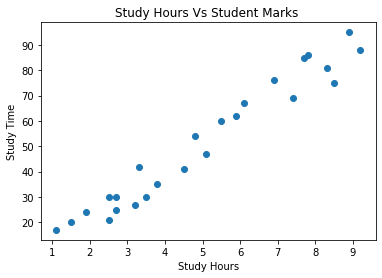

In [108]:
plt.scatter(x=data.Hours,y=data.Scores)
plt.xlabel("Study Hours")
plt.ylabel("Study Time")
plt.title("Study Hours Vs Student Marks ")
plt.show()

In [67]:
#applying machine learning algorithm to data

In [84]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [85]:
data.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [109]:
data2=data.fillna(data.mean())

In [110]:
 data2.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [88]:
data2.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [111]:
#splitting the dataset for training

In [112]:
x=data2.drop("Scores", axis="columns")
y=data2.drop("Hours",axis="columns")
print("shape of x",x.shape)
print("shape of y", y.shape)

shape of x (25, 1)
shape of y (25, 1)


In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.5, random_state=51)

In [113]:
print("shape of X Train",X_train.shape)
print("shape of Y Train",Y_train.shape)
print("shape of X Test", X_test.shape)
print("shape of Y Test",Y_test.shape)

shape of X Train (12, 1)
shape of Y Train (12, 1)
shape of X Test (13, 1)
shape of Y Test (13, 1)


In [19]:
#Linear regression and training the model

In [114]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
print("Training complete.")

Training complete.


In [115]:
lr.fit(X_train.values,Y_train.values)

LinearRegression()

In [116]:
lr.coef_

array([[10.52450549]])

In [49]:
lr.intercept_

array([0.73094051])

In [117]:
m = 10.52
c = 0.73
y = m*25+c
y

263.73

In [118]:
lr.predict([[4]])[0][0].round(2)

42.83

In [119]:
y_pred=lr.predict(X_test.values)
y_pred

array([[58.61572068],
       [81.76963275],
       [73.35002836],
       [88.08433604],
       [29.14710532],
       [54.40591849],
       [78.6122811 ],
       [34.40935807],
       [62.82552288],
       [97.55639098],
       [90.18923714],
       [35.46180861],
       [37.56670971]])

In [99]:
pd.DataFrame(np.c_[X_test,Y_test,y_pred], columns=["studyhours","orginal studentmarks"," predicted studentmarks"])

,studyhours,orginal studentmarks,predicted studentmarks
0,5.5,60.0,58.615721
1,7.7,85.0,81.769633
2,6.9,76.0,73.350028
3,8.3,81.0,88.084336
4,2.7,30.0,29.147105
5,5.1,47.0,54.405918
6,7.4,69.0,78.612281
7,3.2,27.0,34.409358
8,5.9,62.0,62.825523
9,9.2,88.0,97.556391


In [120]:
#accuracy of the model
lr.score(X_test.values,Y_test.values)

0.8800027455831787

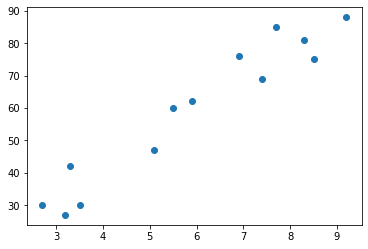

In [121]:
plt.scatter(X_test,Y_test)

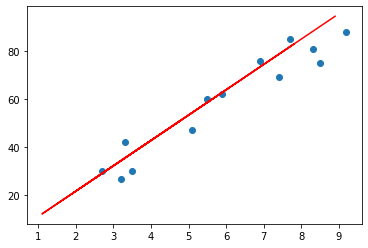

In [101]:
plt.scatter(X_test.values,Y_test.values)
plt.plot(X_train.values,lr.predict(X_train.values),color="red")

In [122]:
#solution
import joblib
joblib.dump(lr,"Student Marks Predictor.pkl")

['Student Marks Predictor.pkl']

In [123]:
model=joblib.load("Student Marks Predictor.pkl")

In [124]:
model.predict([[8]]) #for 8 hours

array([[84.9269844]])

In [58]:
model.predict([[5]]) #for 5 hours

array([[53.35346794]])